# TDA: TP 1

For these exercises, we will use the library [Gudhi](https://gudhi.inria.fr/). You can install it with `conda` or `pip` (on new Apple laptops, only `conda` is available). Let us check that you have a recent version (current is 3.6.0). If for some reason you end up with an old version, you can try to install `gudhi=3.6.0`.

In [1]:
import gudhi as gd
print(gd.__version__)

3.6.0


In [2]:
# We will need a few other libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm
# To get nice interactive plots. May require installing ipympl and restarting the kernel.
# Other possibilities than notebook include qt, osx, tk... If nothing works, just remove this line
%matplotlib notebook

The documentation for the Python interface of Gudhi is [here](https://gudhi.inria.fr/python/latest/). There are also some [tutorials](https://github.com/GUDHI/TDA-tutorial), an [issue tracker](https://github.com/GUDHI/gudhi-devel/issues), a [mailing-list](https://sympa.inria.fr/sympa/arc/gudhi-users/), etc.

## Functions, cubical complex
### Volcano
Let us first define a function from $\mathbb{R}^2$ to $\mathbb{R}$.

<IPython.core.display.Javascript object>


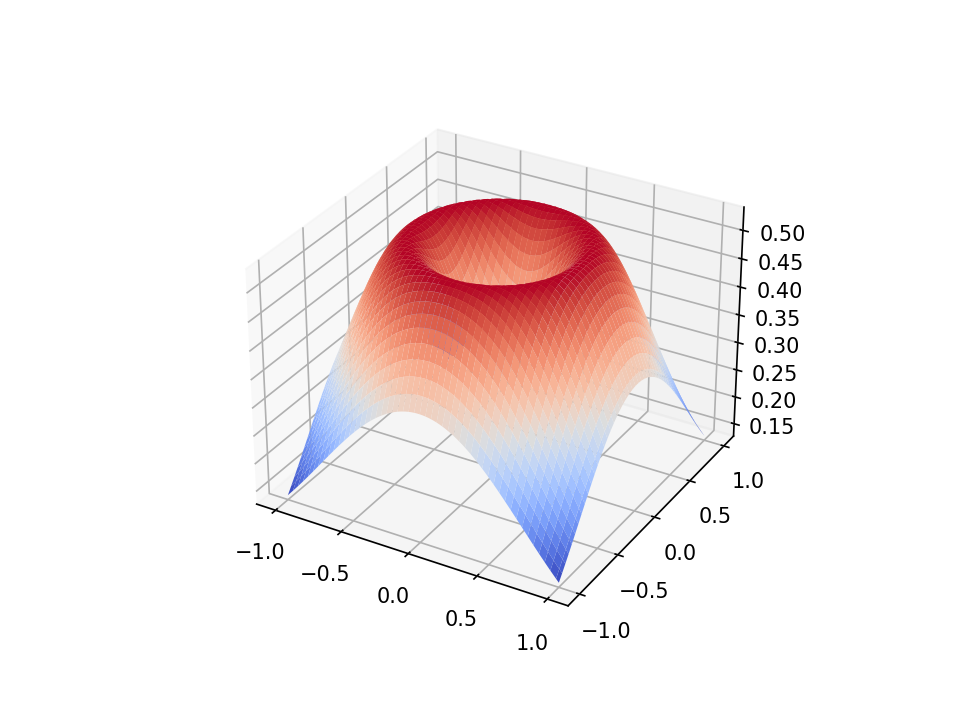

In [3]:
grid = np.linspace(-1,1,100)
gridx = grid[:,np.newaxis]
gridy = grid[np.newaxis,:]
sq = - gridx**2 - gridy**2
volcano = np.exp(sq) - 0.7 * np.exp(sq*4)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(gridx, gridy, volcano, cmap=matplotlib.cm.coolwarm)

Now we have a function, we can build a filtered [cubical complex](https://gudhi.inria.fr/python/latest/cubical_complex_ref.html) from it and compute the persistence diagram of its **sub**levelsets.

<IPython.core.display.Javascript object>


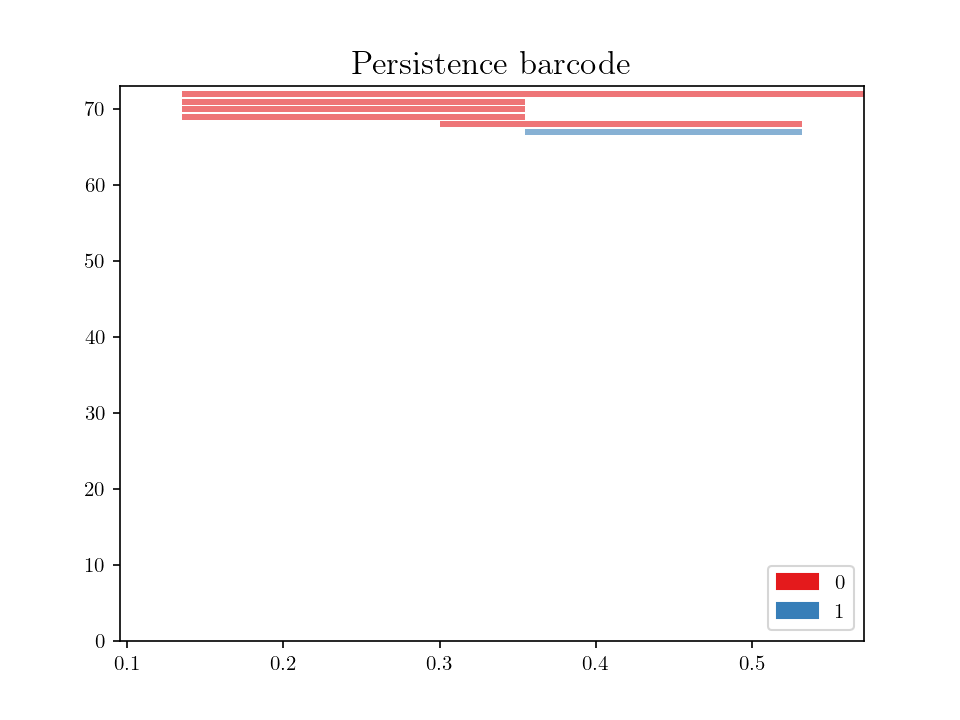

<IPython.core.display.Javascript object>


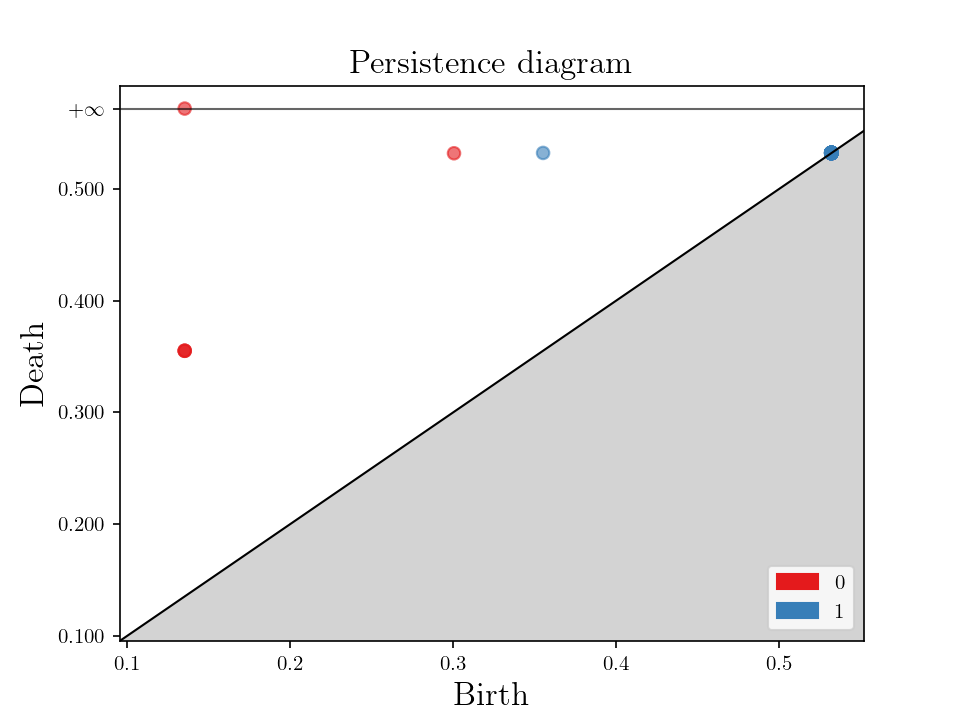

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [4]:
cplx = gd.CubicalComplex(top_dimensional_cells=volcano)
diag = cplx.persistence()
gd.plot_persistence_barcode(diag, legend=True)
gd.plot_persistence_diagram(diag, legend=True)
# red is dimension 0, blue is dimension 1

(The name top_dimensional_cells is because gudhi does the opposite of what we saw in class, it gives the grid values to top-dimensional cells and deduces values for other cells, instead of giving values to vertices and deducing values for other cells. The difference is not important here.)

Compare the 2 plots. Why do we only see 3 red points but 5 red bars? Why are more than 60 of the bars invisible? You can print `diag` to help, the format is a list of `(dimension, (birth, death))`.

3 red bars are (almost) identical, so they show as a single red point with multiplicity 3. The invisible extra bars correspond to the blue point that is almost on the diagonal (so the bars are less than 1 pixel). The top of the volcano has many local maxima, and each generates a very short-lived hole.

Now compute the persistence diagram of the **super**levelsets of this function (hint: there is no direct function to that, only sublevelsets).

<IPython.core.display.Javascript object>


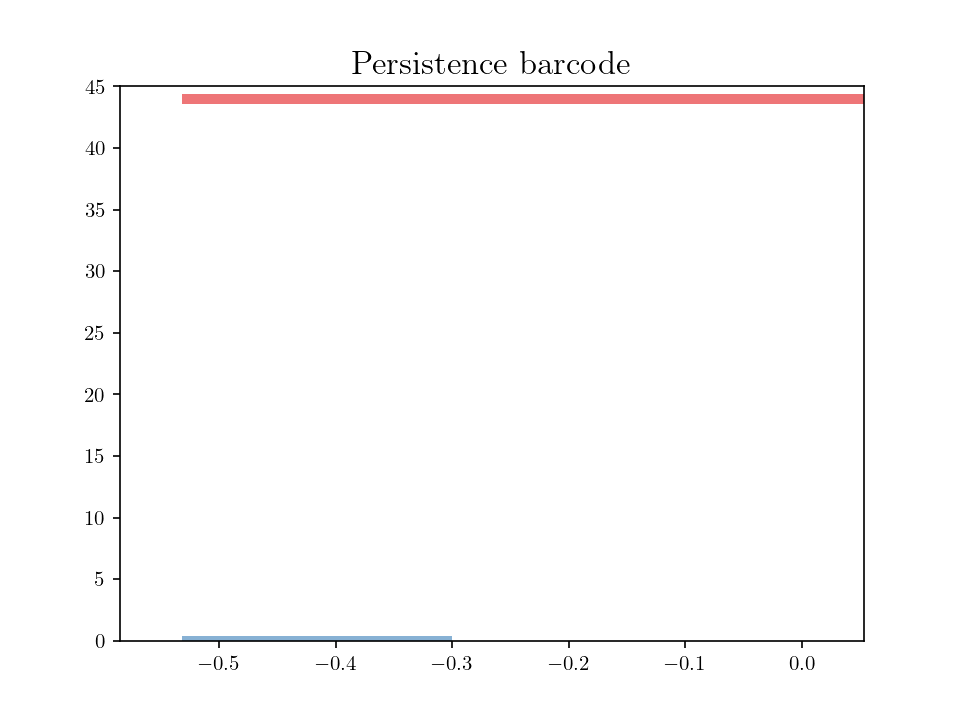

<IPython.core.display.Javascript object>


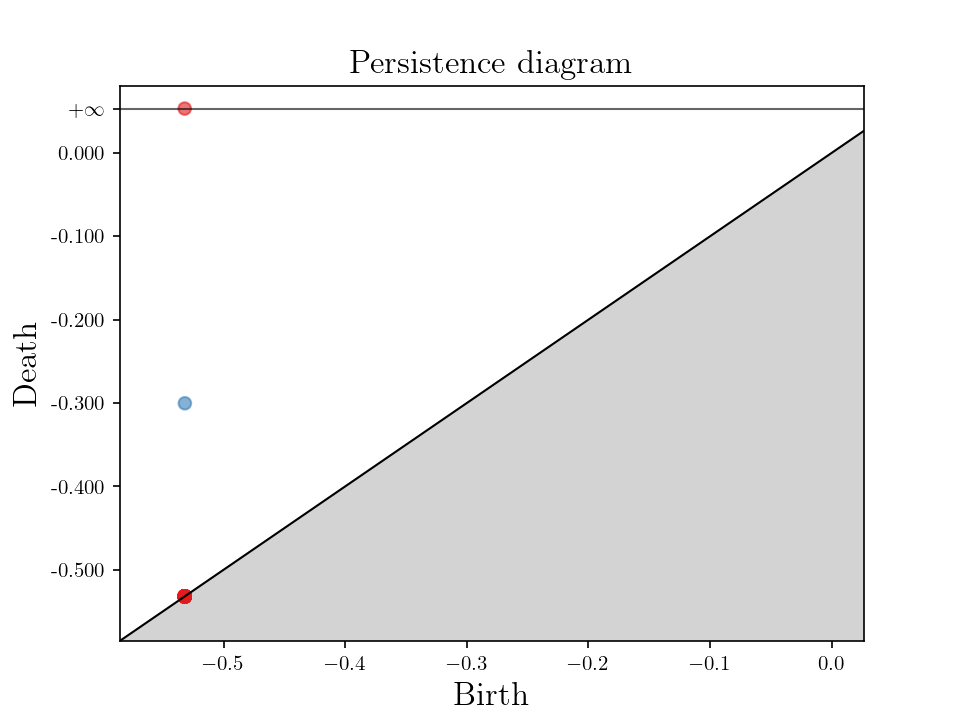

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [5]:
cplx2 = gd.CubicalComplex(top_dimensional_cells=-volcano)
diag2 = cplx2.persistence()
gd.plot_persistence_barcode(diag2)
gd.plot_persistence_diagram(diag2)

What happened to the point corresponding to the crater of the volcano between the sub- and super-levelsets?

It switched from a 0-dimensional feature (from below, we first have only the center, which is a connected component) to a 1-dimensional feature (from above, we are missing the center, that's a hole). There is some notion of duality between the two, although the hypotheses are not quite right for a true correspondence between the two diagrams.

### 1d function
In class, we looked at the function $f: t \mapsto sin(t)+sin(2t)$

Build a table with 200 values of f between 0 and $2\pi$. Plot the function, compute the persistence diagram of its sublevelsets, and draw its persistence diagram.

<IPython.core.display.Javascript object>


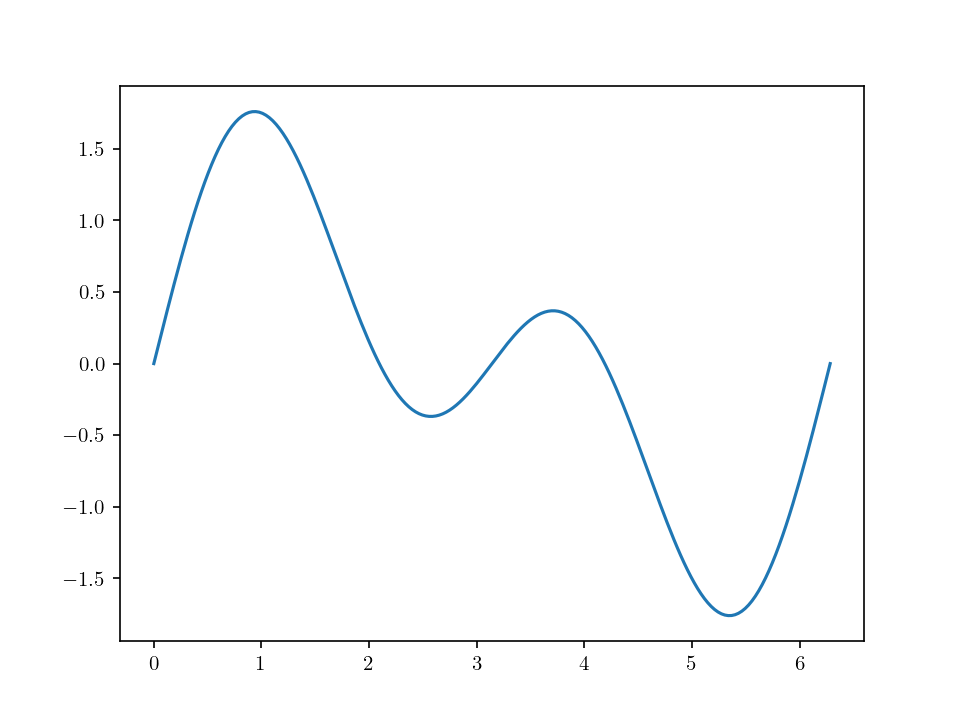

In [6]:
t = np.linspace(0, 2*np.pi, 200)
f = np.sin(t) + np.sin(2*t)
plt.figure()
plt.plot(t,f)
plt.show()

<IPython.core.display.Javascript object>


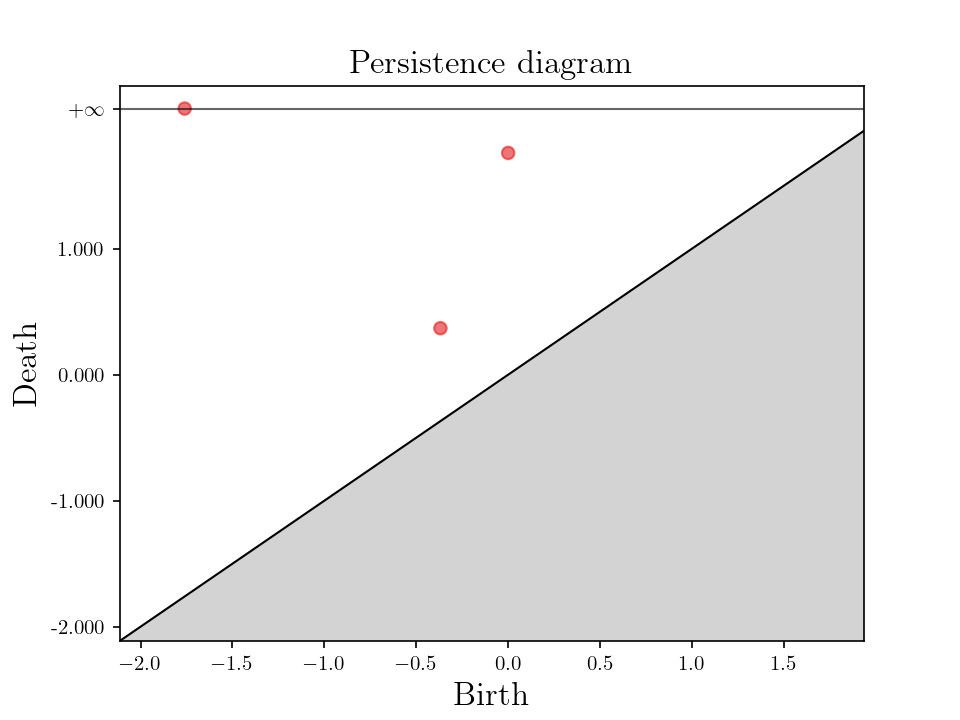

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [7]:
cplx = gd.CubicalComplex(top_dimensional_cells=f)
dgm = cplx.persistence()
gd.plot_persistence_diagram(dgm)

What happens if we consider a longer range instead of `[0, 2π]`?

We will reuse this function later.

## Point sets
### Torus
As in the class, we first consider a set of points regularly spaced along a curve drawn on a torus. For simplicity, we embed this torus in $\mathbb{R}^4$.

<IPython.core.display.Javascript object>


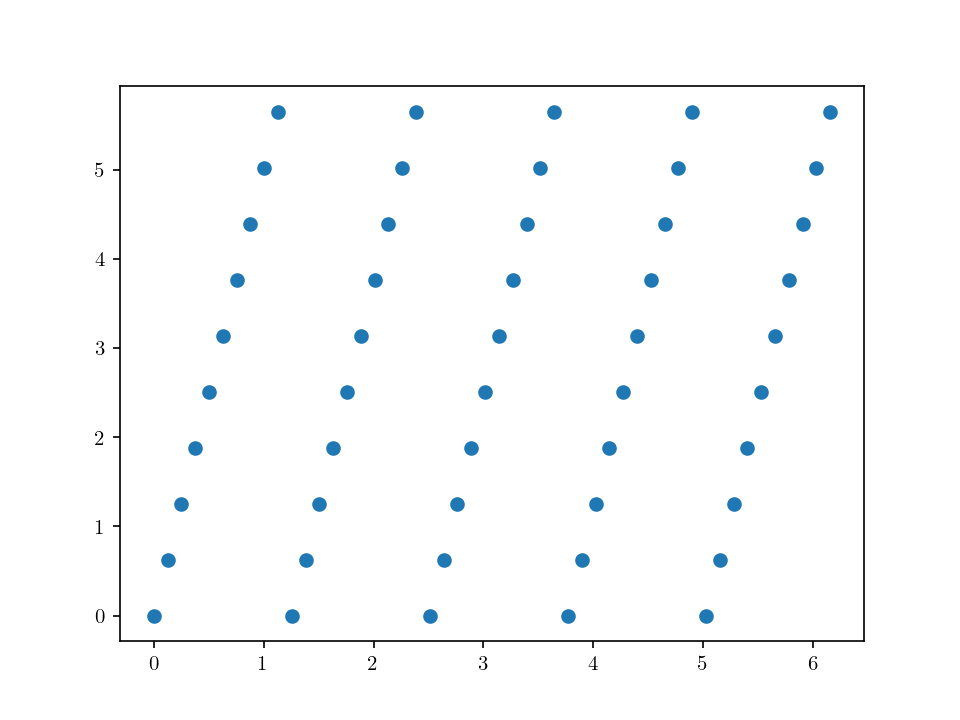

In [8]:
a = np.linspace(0, 2*np.pi, 50, False)
b = np.stack((np.cos(a),np.sin(a),np.cos(5*a),np.sin(5*a)),axis=-1)
# Plot the points on the unwrapped torus
plt.figure()
plt.scatter(a, 5*a % (2*np.pi))
plt.show()

We now compute the persistence of the Čech filtration of these points. We actually use an α-complex for that. Notice that the data-structure used to represent a simplicial complex in Gudhi is called SimplexTree.

[(3, (1.102595812673837, 2.0)), (2, (0.39373133684656436, 1.095491502812549)), (1, (0.09943415215528845, 1.10063495445449)), (1, (0.34549150281252605, 1.0)), (0, (0.0, inf))]


<IPython.core.display.Javascript object>


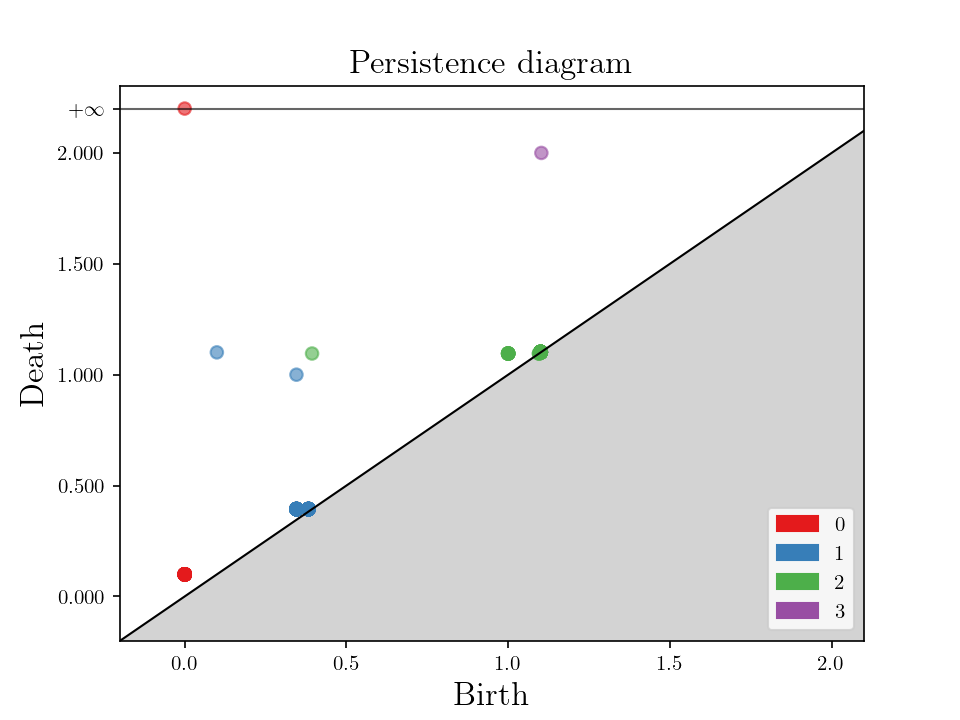

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [9]:
cplx = gd.AlphaComplex(points=b).create_simplex_tree()
p = cplx.persistence()
# print only the most persistent features
print([(dim,(birth,death)) for (dim,(birth,death)) in p if death - birth > .1])
gd.plot_persistence_diagram(p, legend=True)

Can you recognize the features of a torus here? Is there anything extra?

Among the persistent features, we see one connected component, two loops, and one 2d-hole, which corresponds to the topology of a torus. Notice that one of the loops appears significantly earlier than the other, and for a whole range of radii the union of balls centered on the points looks like a thick curve.

More surprising is the feature in dimension 3. We represented the torus as the product of the circles $x^2+y^2=1$ and $z^2+w^2=1$. This implies that all of our points lie on the 3-sphere $x^2+y^2+z^2+w^2=2$. They actually cover enough of this 3-sphere that its topology appears in the diagram.

Now try doing the same computation, but instead of using an α-complex we will approximate the Čech complex with a Rips complex ([doc](https://gudhi.inria.fr/python/latest/rips_complex_ref.html)). What happens if you only change the name of the class? While the α-complex naturally has the ambient dimension, the Rips complex may be built up to an arbitrary dimension, so you need to specify a `max_dimension`. Can you still see the 3-sphere? What happens if you specify a larger dimension, say `max_dimension=5`?

<IPython.core.display.Javascript object>


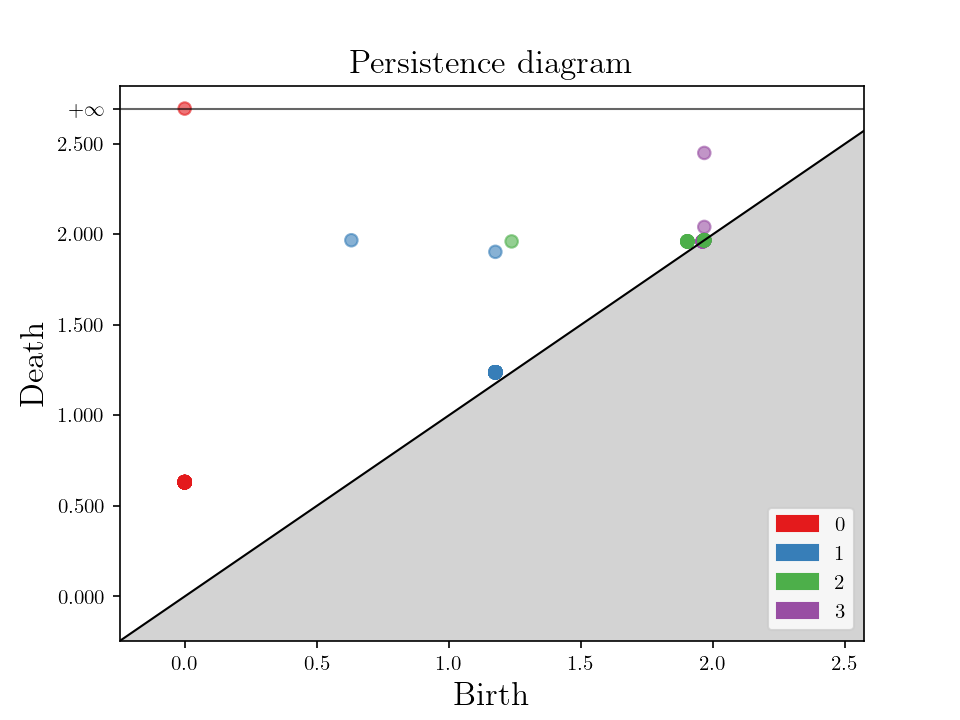

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [10]:
# Homology in dim p requires simplices in dim p+1
cplx = gd.RipsComplex(points=b).create_simplex_tree(max_dimension=4)
p = cplx.persistence()
gd.plot_persistence_diagram(p, legend=True)

With `max_dimension=5`, the program becomes quite slow and takes a lot more memory because the complex is very large. We could make it smaller by ignoring what happens for large radii (parameter `max_edge_length`), but in this case there are no interesting features in dimension 4, only noise.

Once the diagram has been computed with a call to [`persistence()`](https://gudhi.inria.fr/python/latest/simplex_tree_ref.html#gudhi.SimplexTree.persistence) (or just [`compute_persistence()`](https://gudhi.inria.fr/python/latest/simplex_tree_ref.html#gudhi.SimplexTree.compute_persistence) if you do not need the diagram in the form `persistence()` returns), you can get the points of the persistence diagram of dimension i as a convenient (n,2) numpy array:

In [11]:
cplx.persistence_intervals_in_dimension(1)

array([[1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.1755705 , 1.23709637],
       [1.

### Time series
Let us go back to the function $f$ define above. We saw in class that we can turn ([doc](https://gudhi.inria.fr/python/latest/point_cloud.html#time-delay-embedding)) it into a 2d point cloud with nice loops, so we try that.

<IPython.core.display.Javascript object>


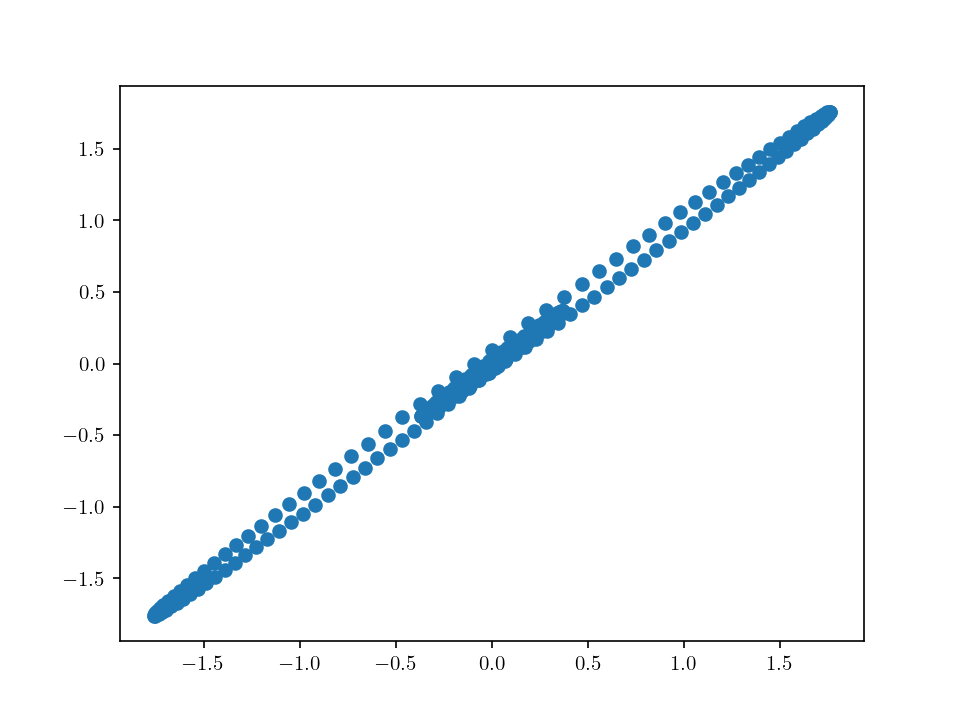

In [12]:
from gudhi.point_cloud.timedelay import TimeDelayEmbedding
f2 = TimeDelayEmbedding(dim=2)(f)
plt.figure()
plt.scatter(f2[:,0],f2[:,1])
plt.show()

Hmm, those loops are way too squished to see anything. Can you fix it?

<IPython.core.display.Javascript object>


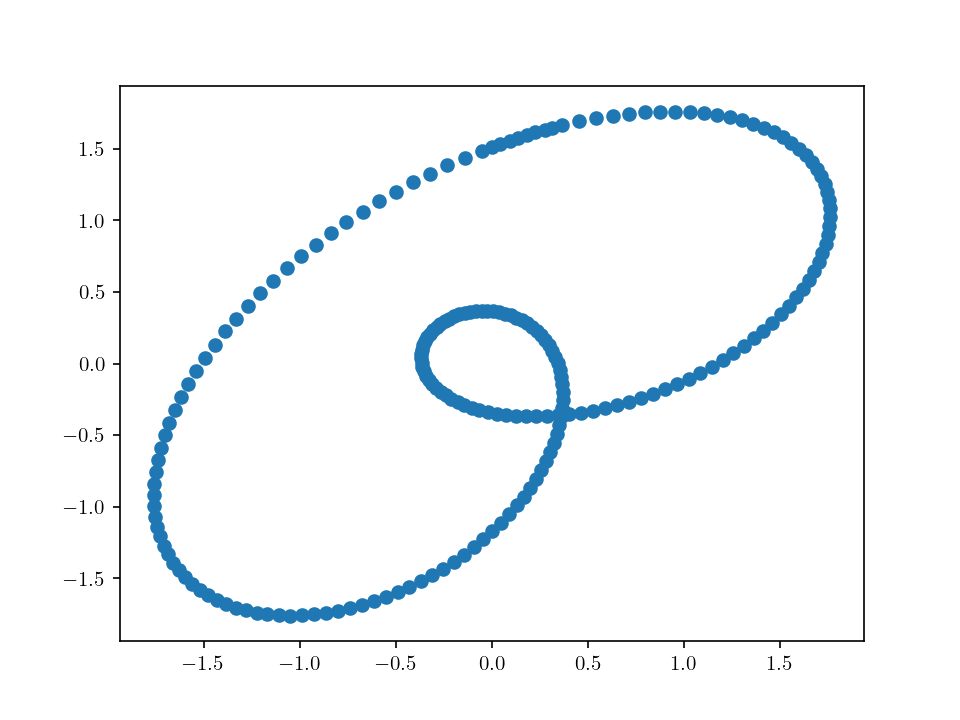

In [13]:
# Add extra points at the end so the lifted version does not have a hole
t = np.linspace(0, 7, 230)
f = np.sin(t) + np.sin(2*t)
# Add some delay
f2 = TimeDelayEmbedding(dim=2, delay=20)(f)
plt.figure()
plt.scatter(f2[:,0],f2[:,1])
plt.show()

Once the figure looks nice, compute or approximate the persistence diagram of the Čech filtration of this point set (here you have several choices). Dimension 1 seems the most relevant. Does the result have any connection with the diagram of the sublevelset computed at the beginning?

<IPython.core.display.Javascript object>


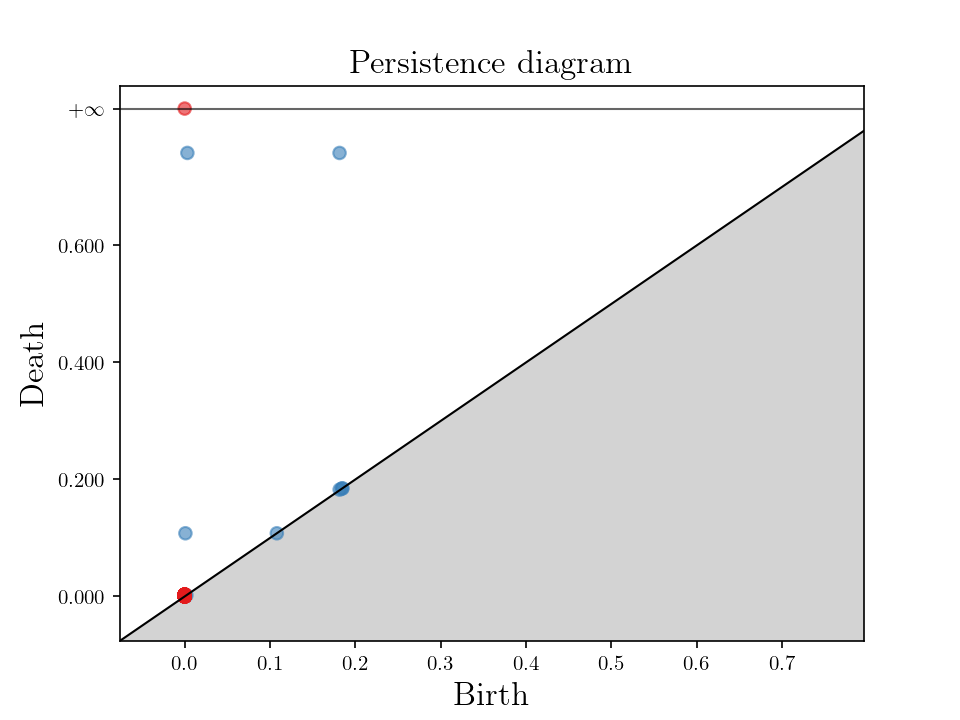

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [14]:
dgm = gd.AlphaComplex(points=f2).create_simplex_tree().persistence()
gd.plot_persistence_diagram(dgm)

We quickly get 2 loops, one for the small inner loop, and one for the whole curve. The inner loop is filled early. A bit later, the upper part joins the top of the small loop, which splits the large loops into two (this counts as one new loop). Eventually, they both get filled and disappear.

There does not seem to be any relation with the diagram of sublevelsets, they provide different information, and we cannot say a priori which one will be more relevant to a specific application.

## Manually creating a filtration
If you are not satisfied with the existing filtrations (AlphaComplex, RipsComplex, etc), you can also construct a simplicial complex by hand, specifying each simplex and its filtration value.

Create an empty simplicial complex ([doc](https://gudhi.inria.fr/python/latest/simplex_tree_ref.html)) and `insert` a few simplices. You can see the list of simplices in your complex using `list(cplx.get_simplices())`. Notice that when you `insert` a simplex with filtration value `f`, the library helpfully ensures that the faces of this simplex are also present with a filtration value at most `f`. The function `assign_filtration` can be useful to change the filtration value of a simplex, but it does not provide this safety net.

In [15]:
cplx = gd.SimplexTree()
cplx.insert([0], 1.2)
cplx.insert([2], 0.7)
cplx.insert([1,0,2], 0.9) # also adds faces and changes the value of [0]
print(list(cplx.get_simplices()))
cplx.insert([0,1], 0.8) # changes several values
print(list(cplx.get_simplices()))
cplx.insert([1], 2.5) # nothing, [1] already has a value smaller than 2.5
print(list(cplx.get_simplices()))

[([0, 1, 2], 0.9), ([0, 1], 0.9), ([0, 2], 0.9), ([0], 0.9), ([1, 2], 0.9), ([1], 0.9), ([2], 0.7)]
[([0, 1, 2], 0.9), ([0, 1], 0.8), ([0, 2], 0.9), ([0], 0.8), ([1, 2], 0.9), ([1], 0.8), ([2], 0.7)]
[([0, 1, 2], 0.9), ([0, 1], 0.8), ([0, 2], 0.9), ([0], 0.8), ([1, 2], 0.9), ([1], 0.8), ([2], 0.7)]


The following code constructs a small torus.
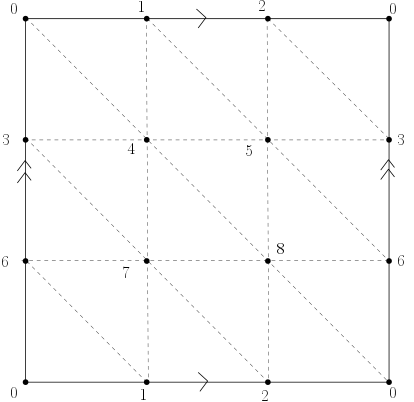
In this example, we do not care about filtration values (everything is inserted at time 0), only the topology of the full complex.

In [16]:
cplx = gd.SimplexTree()
for i in range(3):
    ii = (i + 1) % 3
    for j in range(3):
        jj = (j + 1) % 3
        cplx.insert([3*i+j, 3*ii+jj, 3*ii+j])
        cplx.insert([3*i+j, 3*ii+jj, 3*i+jj])
print(list(cplx.get_simplices()))
# Since homology in dim p uses simplices of dim p and p+1, persistence is by default computed up to dim-1.
cplx.compute_persistence(persistence_dim_max=True)
print("The number of holes of dimension [0, 1, 2] are", cplx.betti_numbers())

[([0, 1, 4], 0.0), ([0, 1, 6], 0.0), ([0, 1], 0.0), ([0, 2, 3], 0.0), ([0, 2, 8], 0.0), ([0, 2], 0.0), ([0, 3, 4], 0.0), ([0, 3], 0.0), ([0, 4], 0.0), ([0, 6, 8], 0.0), ([0, 6], 0.0), ([0, 8], 0.0), ([0], 0.0), ([1, 2, 5], 0.0), ([1, 2, 7], 0.0), ([1, 2], 0.0), ([1, 4, 5], 0.0), ([1, 4], 0.0), ([1, 5], 0.0), ([1, 6, 7], 0.0), ([1, 6], 0.0), ([1, 7], 0.0), ([1], 0.0), ([2, 3, 5], 0.0), ([2, 3], 0.0), ([2, 5], 0.0), ([2, 7, 8], 0.0), ([2, 7], 0.0), ([2, 8], 0.0), ([2], 0.0), ([3, 4, 7], 0.0), ([3, 4], 0.0), ([3, 5, 6], 0.0), ([3, 5], 0.0), ([3, 6, 7], 0.0), ([3, 6], 0.0), ([3, 7], 0.0), ([3], 0.0), ([4, 5, 8], 0.0), ([4, 5], 0.0), ([4, 7, 8], 0.0), ([4, 7], 0.0), ([4, 8], 0.0), ([4], 0.0), ([5, 6, 8], 0.0), ([5, 6], 0.0), ([5, 8], 0.0), ([5], 0.0), ([6, 7], 0.0), ([6, 8], 0.0), ([6], 0.0), ([7, 8], 0.0), ([7], 0.0), ([8], 0.0)]
The number of holes of dimension [0, 1, 2] are [1, 2, 1]


By gluing some "spheres" and "circles" (the boundary of a simplex for instance is a *topological* sphere), can you build a simplicial complex that has the same homology as the torus but looks nothing like a torus?

In [17]:
cplx = gd.SimplexTree()
# Cheap trick: insert also inserts the faces while remove only removes the simplex itself
def add_sphere(cplx, simplex):
    cplx.insert(simplex)
    cplx.remove_maximal_simplex(simplex)
add_sphere(cplx, [0,1,2,3])
add_sphere(cplx, [0,4,5])
add_sphere(cplx, [1,6,7])
print(list(cplx.get_simplices()))
cplx.compute_persistence(persistence_dim_max=True)
print("The number of holes of dimension [0, 1, 2] are", cplx.betti_numbers())

[([0, 1, 2], 0.0), ([0, 1, 3], 0.0), ([0, 1], 0.0), ([0, 2, 3], 0.0), ([0, 2], 0.0), ([0, 3], 0.0), ([0, 4], 0.0), ([0, 5], 0.0), ([0], 0.0), ([1, 2, 3], 0.0), ([1, 2], 0.0), ([1, 3], 0.0), ([1, 6], 0.0), ([1, 7], 0.0), ([1], 0.0), ([2, 3], 0.0), ([2], 0.0), ([3], 0.0), ([4, 5], 0.0), ([4], 0.0), ([5], 0.0), ([6, 7], 0.0), ([6], 0.0), ([7], 0.0)]
The number of holes of dimension [0, 1, 2] are [1, 2, 1]



Nope, not a torus. Homology extracts useful information, but it also loses a lot (unless... see class 3).

## Rips filtration and higher dimensions
In class, we saw that the Rips complex is not embedded, it is defined as an abstract simplicial complex. Here we will see that the higher dimensional simplices that appear can actually generate some topology.

Generate 20 points evenly spaced on a circle in ℝ². Build the Rips filtration on those points up to dimension 8, and plot its persistence diagram. What do you notice? You can try again with 21, 22, 23 or 24 points. You probably shouldn't try to increase the dimension or the number of points too much as it will quickly fill the memory on your computer.

<IPython.core.display.Javascript object>


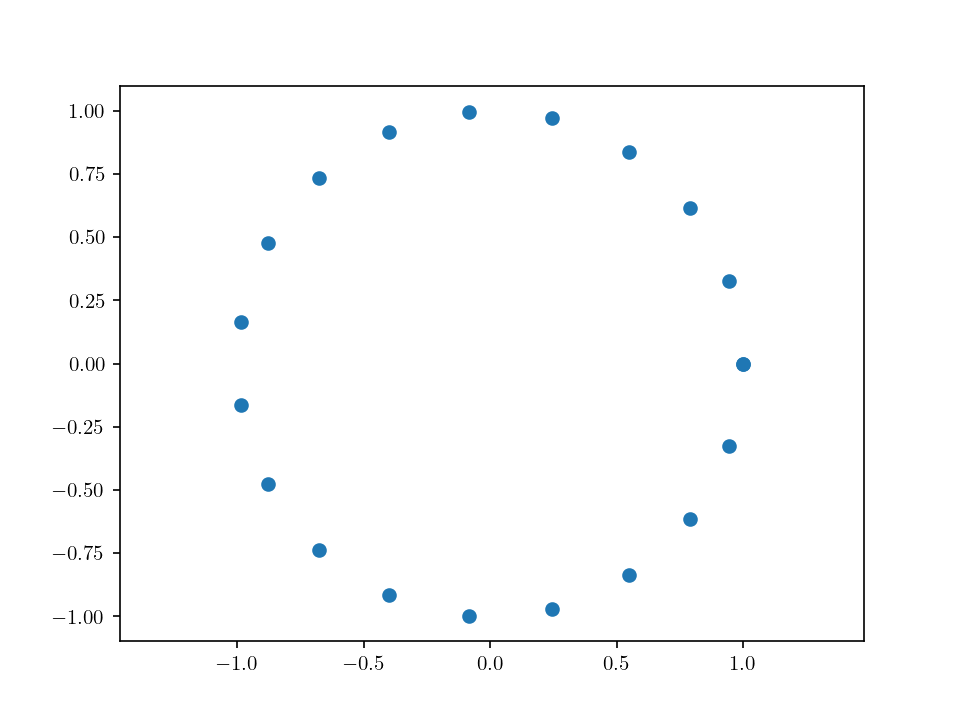

(-1.0856793685728585,
 1.0993180651701362,
 -1.0962429423073368,
 1.0962429423073368)

In [18]:
# With 20 points
t = np.linspace(0, 2*np.pi, 20)
X = np.stack([np.cos(t), np.sin(t)]).T
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

<IPython.core.display.Javascript object>


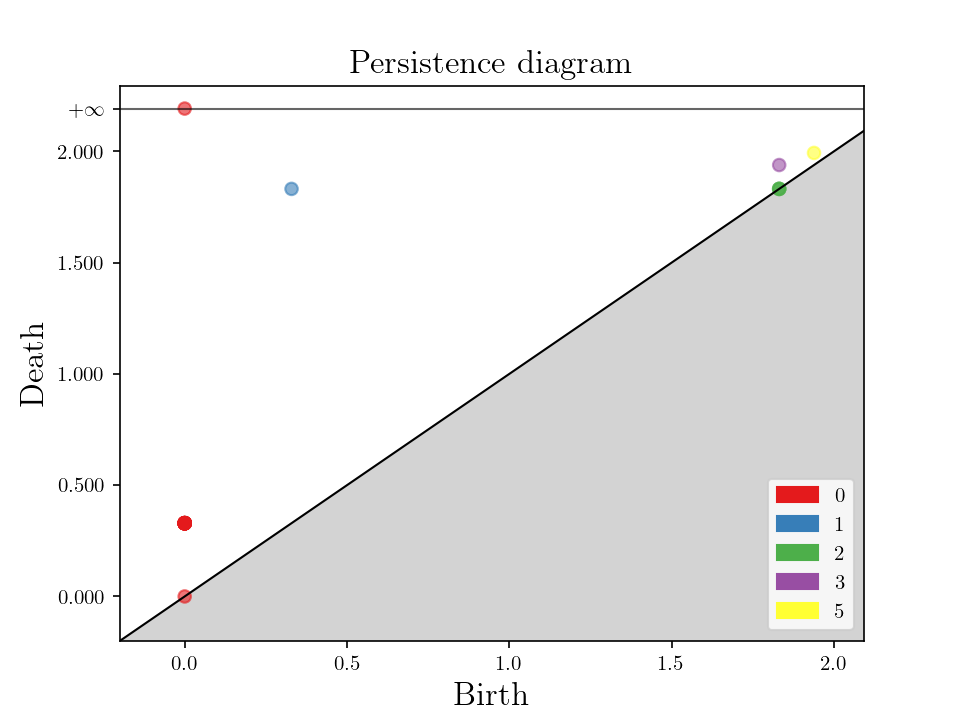

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [19]:
gd.plot_persistence_diagram(gd.RipsComplex(points=X).create_simplex_tree(max_dimension=8).persistence(),legend=True)

<IPython.core.display.Javascript object>


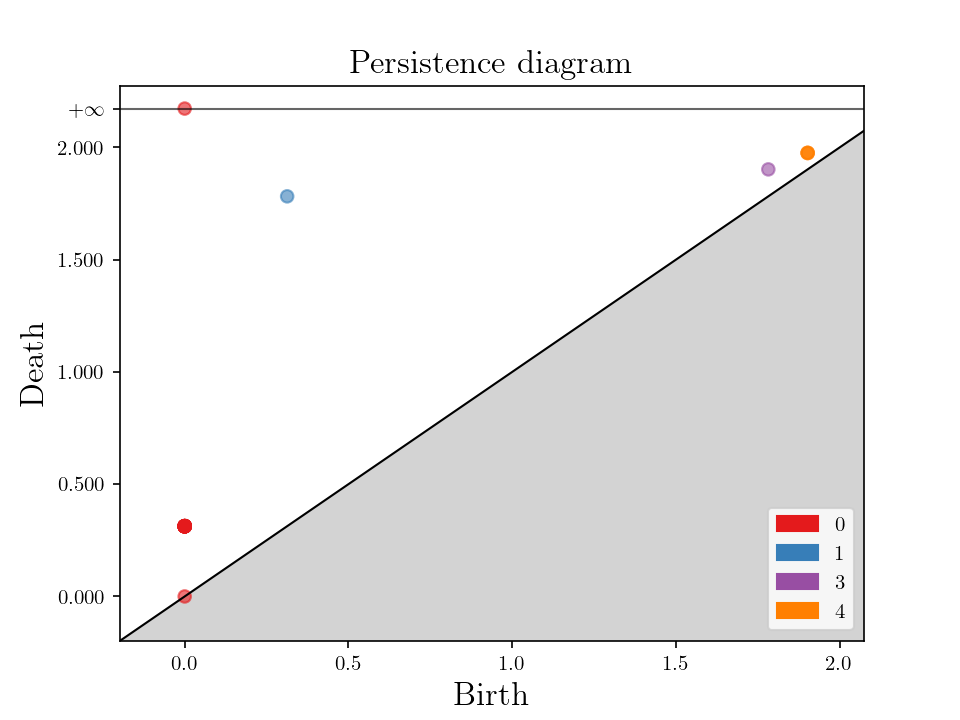

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [20]:
# 21 points
t = np.linspace(0, 2*np.pi, 21)
X = np.stack([np.cos(t), np.sin(t)]).T
gd.plot_persistence_diagram(gd.RipsComplex(points=X).create_simplex_tree(max_dimension=8).persistence(),legend=True)

<IPython.core.display.Javascript object>


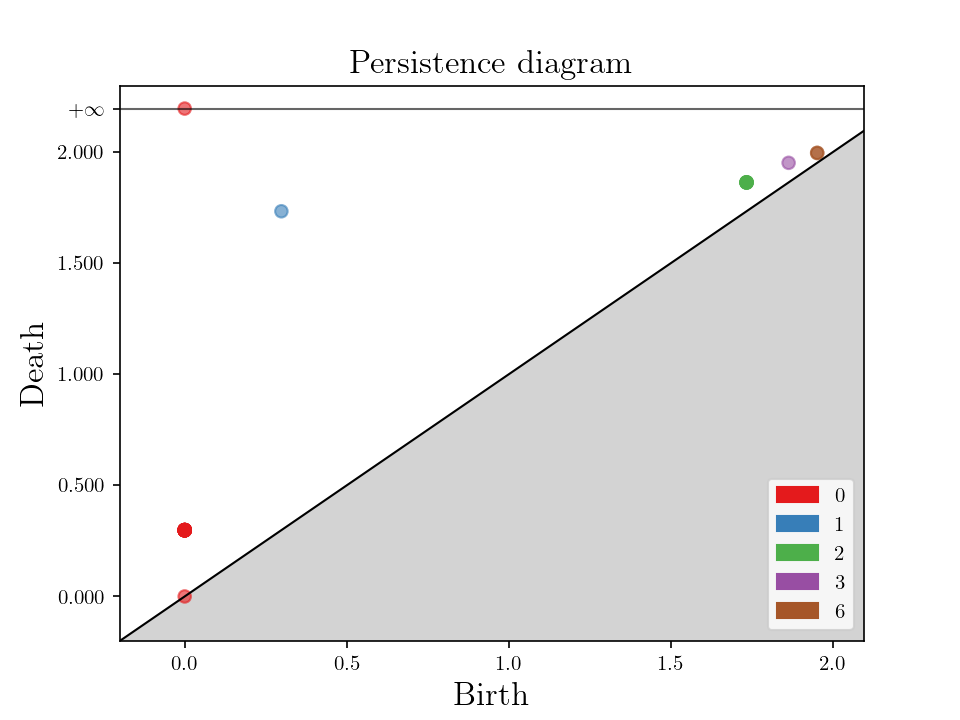

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [21]:
# 22 points
t = np.linspace(0, 2*np.pi, 22)
X = np.stack([np.cos(t), np.sin(t)]).T
gd.plot_persistence_diagram(gd.RipsComplex(points=X).create_simplex_tree(max_dimension=8).persistence(),legend=True)

<IPython.core.display.Javascript object>


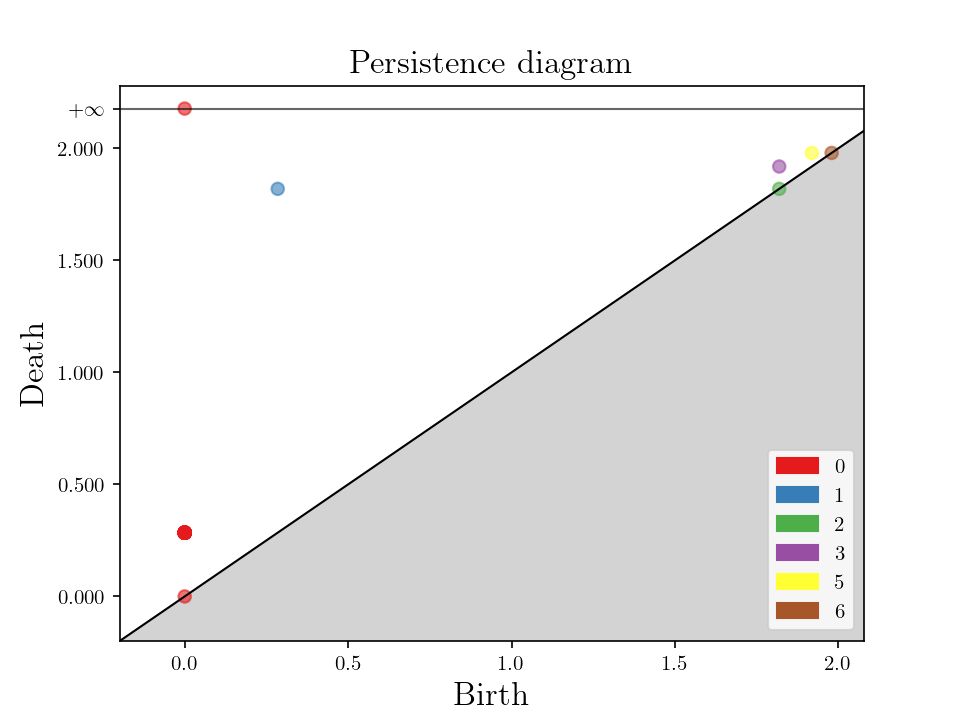

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [22]:
# 23 points
t = np.linspace(0, 2*np.pi, 23)
X = np.stack([np.cos(t), np.sin(t)]).T
gd.plot_persistence_diagram(gd.RipsComplex(points=X).create_simplex_tree(max_dimension=8).persistence(),legend=True)

<IPython.core.display.Javascript object>


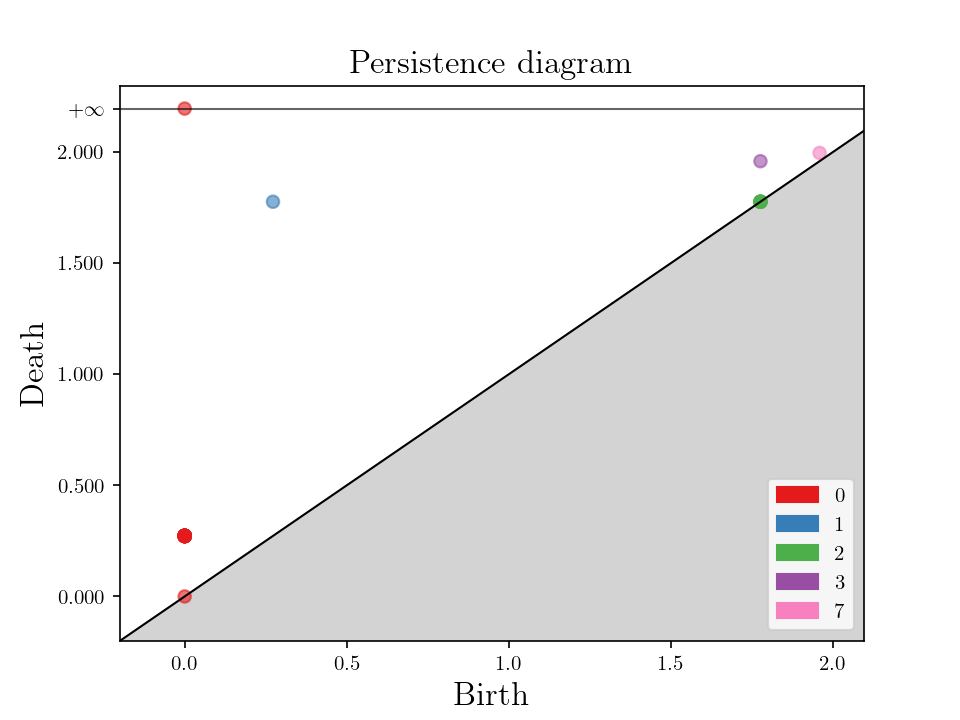

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [23]:
# 24 points
t = np.linspace(0, 2*np.pi, 24)
X = np.stack([np.cos(t), np.sin(t)]).T
gd.plot_persistence_diagram(gd.RipsComplex(points=X).create_simplex_tree(max_dimension=8).persistence(),legend=True)

Some of those features are only present with few points, but this phenomenon of topology in dimension higher than the ambient space does not disappear. If we consider an infinite point set with all the points of the circle (yes, we are allowed to do that!), when we increase `r`, the Rips complex first looks like a circle, and as soon as the circle gets filled it has the topology of a 3-sphere, and as soon as that disappears it gets the topology of a 5-sphere, etc with all the odd dimensions, until the complex becomes contractible.

## Distance and stability
### Point sets
Let us consider again the point set on a curve on a torus in $\mathbb{R}^4$, and compute the persistence diagram of dimension 1 of its Rips filtration. Now perturb each point randomly by a small noise, and compute the persistence diagram of dimension 1 of these new points. Compute the [bottleneck distance](https://gudhi.inria.fr/python/latest/bottleneck_distance_user.html#gudhi.bottleneck_distance) between these diagrams. Retry it a few times, maybe also with dimension 0 or 2. Can you confirm the stability result?

In [24]:
cplx = gd.RipsComplex(points=b).create_simplex_tree(2)
cplx.compute_persistence()
d1 = cplx.persistence_intervals_in_dimension(1)
# Generate random points in a small ball
epsilon = .001
l = []
while len(l) < len(b):
    pt = np.random.rand(4) * 2 - 1 # points in a square centered at origin
    if np.linalg.norm(pt) <= 1:
        l.append(pt) # Only keep the points in a ball of radius 1
noise = np.array(l) * epsilon
b_pert = b + noise
cplx_pert = gd.RipsComplex(points=b_pert).create_simplex_tree(2)
cplx_pert.compute_persistence()
d1_pert = cplx_pert.persistence_intervals_in_dimension(1)
print(gd.bottleneck_distance(d1, d1_pert))

0.0015799184147837764


The distance we get is larger than `epsilon`! But... smaller than `2*epsilon`. That's because Gudhi uses the diameter of simplices as filtration value for Rips complexes, instead of half of the diameter.

Now do the same experiment with the alpha-complex. Note that there is an even worse trap than for the Rips.

In [25]:
cplx = gd.AlphaComplex(points=b).create_simplex_tree()
cplx.compute_persistence()
d1a = cplx.persistence_intervals_in_dimension(1)
# Generate random points in a small ball
epsilon = .001
l = []
while len(l) < len(b):
    pt = np.random.rand(4) * 2 - 1 # points in a square centered at origin
    if np.linalg.norm(pt) <= 1:
        l.append(pt) # Only keep the points in a ball of radius 1
noise = np.array(l) * epsilon
b_pert = b + noise
cplx_pert = gd.AlphaComplex(points=b_pert).create_simplex_tree()
cplx_pert.compute_persistence()
d1a_pert = cplx_pert.persistence_intervals_in_dimension(1)
# AlphaComplex uses the square of distances, get back to true distances
d1a = np.sqrt(d1a)
d1a_pert = np.sqrt(d1a_pert)
print(gd.bottleneck_distance(d1a, d1a_pert))

0.0007097028275128148


The trap this time is that AlphaComplex uses square distances (if you are curious, this is because it also handles weights, which can make those values negative and would make the square root problematic).

In class, we said that Rips and Čech filtrations have close persistence diagrams in log-scale. Can you illustrate that on this dataset?

In [26]:
print(gd.bottleneck_distance(np.log(d1/2), np.log(d1a)), "is smaller than", np.log(2))

0.06505554970524599 is smaller than 0.6931471805599453


The distance is actually much smaller than the factor 2 in the interleaving (the inclusions between Rips and Čech) suggests.

### Functions
Similarly, illustrate the stability property on one of the functions seen above (either the volcano, or the curve).